In [66]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# Sync the data
!rsync -r raven:/scratch/smavak/axlml/data/ data


Welcome to Raven, ARCCA's HPC System

This system is for authorised users, if you do not have authorised access 
please disconnect immediately and contact arcca@cardiff.ac.uk for assistance.

For new users please note the following:
 * the username contains only lowercase letters.
 * for security, the password field will stay empty whilst you type but it is
   being entered.



In [68]:
# Read in the parameters file
p_df = pd.read_csv("data/parameters.csv")
p_df.describe()

,noise,probend,repetitions,seed,size,turns
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.494481,0.511652,54.465465,166.000000,38.201201,100.729730
std,0.298480,0.280763,25.741934,96.273049,44.661360,58.408142
min,0.001849,0.000374,10.000000,0.000000,2.000000,1.000000
25%,0.208423,0.266155,33.000000,83.000000,2.000000,52.000000
50%,0.503099,0.507584,53.000000,166.000000,3.000000,97.000000
75%,0.752098,0.758946,76.000000,249.000000,71.000000,152.000000
max,0.998080,0.995985,100.000000,332.000000,133.000000,200.000000


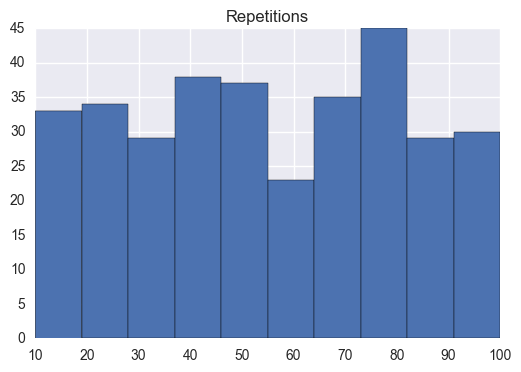

In [69]:
plt.hist(p_df.repetitions)
plt.title("Repetitions");

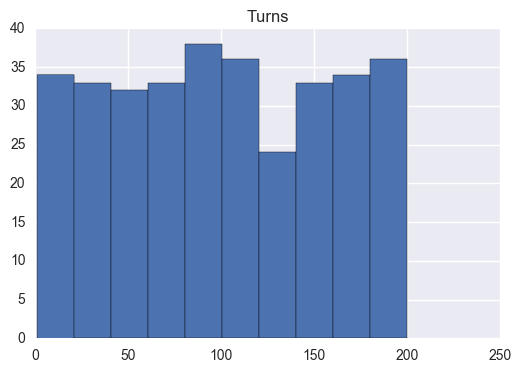

In [70]:
plt.hist(p_df.turns)
plt.title("Turns");

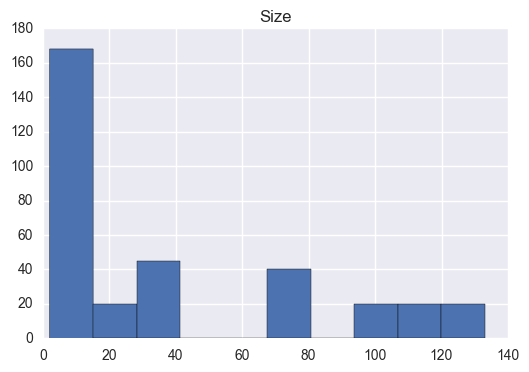

In [71]:
plt.hist(p_df['size'])
plt.title("Size");

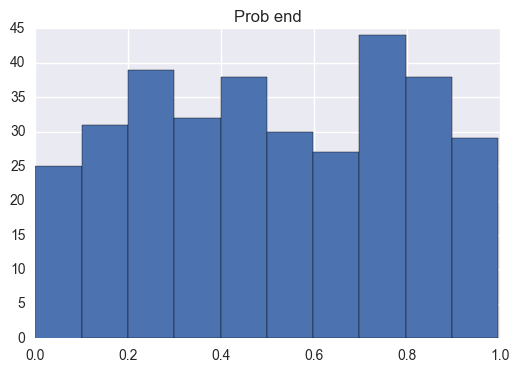

In [72]:
plt.hist(p_df['probend'])
plt.title("Prob end");

In [73]:
import axelrod as axl
axl.__version__, len(axl.strategies)  # Using 1.14: 145 strategies

('1.14.0', 145)

In [65]:
played_strategies = set(pd.unique((p_df.ix[:,1:-5]).values.ravel()))
strategies = set(s().__repr__() for s in axl.strategies)
len(strategies - played_strategies)  # Al strategies have been played

0